# 03_pm_depth_gtdb

## Load packages and data

In [44]:
# load packages
import pandas as pd
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import warnings

# global options
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# load functions
def count_classified(df, level):
    level_prefix = level[0] + '__'
    subdf = df[(df[level] != 'Unclassified') & (~df[level].isna()) & (df[level] != '') & (df[level] != level_prefix)]
    return len(subdf)

# file paths
path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

# load proximeta master table
proximeta_master = pd.read_csv(op.join(path,'tables/proximeta_master.csv'))

# subset all observations with a classified host
proximeta_hosts = proximeta_master[(proximeta_master['classification'].notna()) & (proximeta_master['classification'] != 'Unclassified Bacteria') & (proximeta_master['classification'] != 'Unclassified')]

# create a dataframe for each depth
d400 = proximeta_hosts.groupby('sample_depth').get_group(400)
d140 = proximeta_hosts.groupby('sample_depth').get_group(140)
d95 = proximeta_hosts.groupby('sample_depth').get_group(95)
d80 = proximeta_hosts.groupby('sample_depth').get_group(80)

## Breakdown

In [7]:
proximeta_hosts.groupby('sample_depth').size().reset_index(name='count')

,sample_depth,count
0,80,82
1,95,159
2,140,129
3,400,173


There are 82 total cells with classified hosts at 80 meters, 159 at 95 meters, 129 at 140 meters, and 173 at 400 meters. There may be more total cells the deeper into the OMZ, with the exceptions of 95 and 140 meters, which is surprising. My hypothesis was the total number of cells would decrease along with decreasing oxygen concentrations and therefore decrease with increasing depth.

   sample_depth      virus_type  count     percent
0            80  uninfected mag     82  100.000000
1            95          contig     45   28.301887
2            95  uninfected mag    111   69.811321
3            95            vmag      3    1.886792
4           140          contig     40   31.007752
5           140  uninfected mag     82   63.565891
6           140            vmag      7    5.426357
7           400          contig     68   39.306358
8           400  uninfected mag    101   58.381503
9           400            vmag      4    2.312139


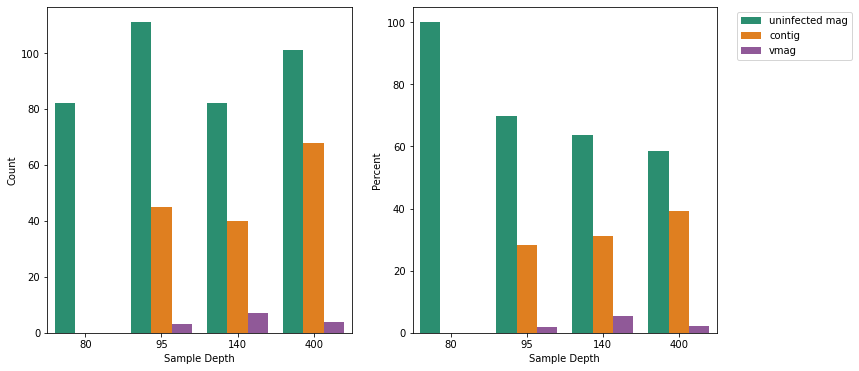

In [42]:
vtype_plot = proximeta_hosts.groupby(['sample_depth','virus_type']).size().reset_index(name='count')

for index, row in vtype_plot.iterrows():
    if row['sample_depth'] == 80:
        vtype_plot.at[index, 'percent'] = row['count'] / 82 * 100
    elif row['sample_depth'] == 95:
        vtype_plot.at[index, 'percent'] = row['count'] / 159 * 100
    elif row['sample_depth'] == 140:
        vtype_plot.at[index, 'percent'] = row['count'] / 129 * 100
    elif row['sample_depth'] == 400:
        vtype_plot.at[index, 'percent'] = row['count'] / 173 * 100

print(vtype_plot)

custom_palette = {'uninfected mag': '#1b9e77', 'contig': '#ff7f00', 'vmag': '#984ea3'}

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))

sns.barplot(x='sample_depth', y='count', data = vtype_plot, hue='virus_type', palette=custom_palette, ax=axes[0])
axes[0].get_legend().remove()
axes[0].set_xlabel('Sample Depth')
axes[0].set_ylabel('Count')

sns.barplot(x='sample_depth', y='percent', data = vtype_plot, hue='virus_type', palette=custom_palette, ax=axes[1])
axes[1].set_xlabel('Sample Depth')
axes[1].set_ylabel('Percent')
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

This figure shows the raw counts (left) and percents (right) of the classified cells for each sample depth. Green bars represent uninfected mags, orange bars represent cells infected with viral contigs, and purple bars represent cells infected with vmags. Sample depth is on the x-axes and either count or percent are on the y-axes.

The majority of classified cells at each sample depth are uninfected mags. For the 80 meter sample, there are no detected infections in the proximeta data. This sample has the highest concentration of oxygen. As seen in the 02_pm_contig_vs_vmag_gtdb notebook, there are a lot more classified cells infected with viral contigs than vmags. As depth increases, the percentage of uninfected cells decreases and the percentage of infected cells increases.

## How many cells were classified to at least each level for all sample depths?

There are 82 cells annotated to domain .
There are 79 cells annotated to phyla .
There are 79 cells annotated to class .
There are 79 cells annotated to order .
There are 78 cells annotated to family .
There are 69 cells annotated to genus .
There are 49 cells annotated to species .
  tax_level  num_cells_classified  percent_classified  sample_depth
0    domain                    82          100.000000            80
1     phyla                    79           96.341463            80
2     class                    79           96.341463            80
3     order                    79           96.341463            80
4    family                    78           95.121951            80
5     genus                    69           84.146341            80
6   species                    49           59.756098            80


Text(0.5, 1.0, 'Percent of Cells Classified with GTDB')

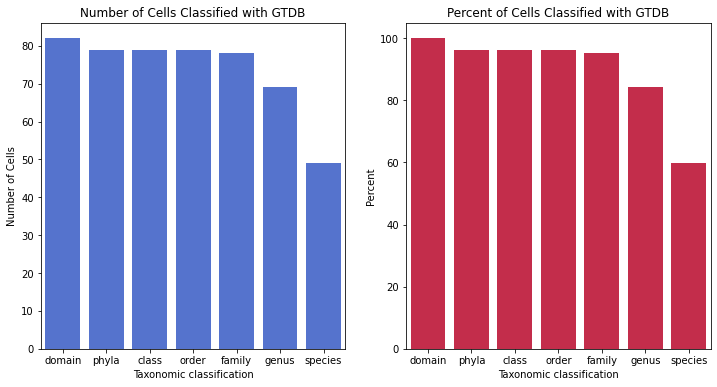

In [55]:
''' 80 meters '''

d80_level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    d80_lcount = count_classified(d80, level)
    print('There are', d80_lcount, 'cells annotated to', level,".") 
    d80_level_counts.append(d80_lcount)

# create a dictionary with the number classified for each level
d80_tax_dict = {'tax_level': levels, 'num_cells_classified': d80_level_counts} 

# create a dataframe from the dictionary
d80_tax_df = pd.DataFrame(data = d80_tax_dict)

# calculate total number of cells classified
d80_tot = len(d80)

# add an percent column
d80_tax_df['percent_classified'] = d80_tax_df['num_cells_classified']/d80_tot*100

# add a sample_depth column
d80_tax_df['sample_depth'] = 80

print(d80_tax_df)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = d80_tax_df, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].set_title('Number of Cells Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = d80_tax_df, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_title('Percent of Cells Classified with GTDB')

This figure shows the number of cells with classified at each depth in both raw counts (on the left in blue) and percentages (on the right in red) for all of the taxonomic levels. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the right axis. Of all of the cells with classified hosts, the majority of them were classfied down to the species level. 

There are 159 cells annotated to domain .
There are 157 cells annotated to phyla .
There are 157 cells annotated to class .
There are 156 cells annotated to order .
There are 154 cells annotated to family .
There are 123 cells annotated to genus .
There are 70 cells annotated to species .
  tax_level  num_cells_classified  percent_classified  sample_depth
0    domain                   159          100.000000            95
1     phyla                   157           98.742138            95
2     class                   157           98.742138            95
3     order                   156           98.113208            95
4    family                   154           96.855346            95
5     genus                   123           77.358491            95
6   species                    70           44.025157            95


Text(0.5, 1.0, 'Percent of Cells Classified with GTDB')

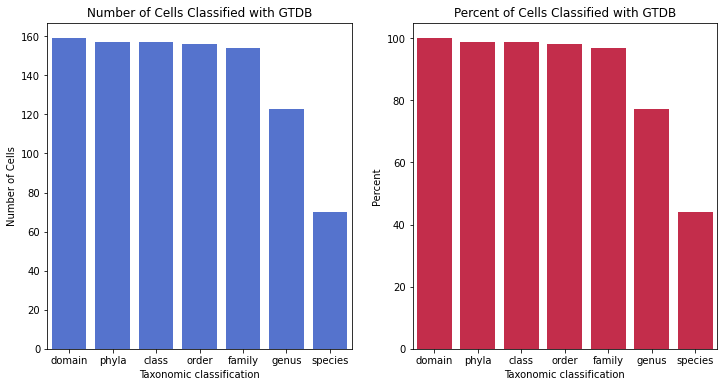

In [56]:
''' 95 meters '''

d95_level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    d95_lcount = count_classified(d95, level)
    print('There are', d95_lcount, 'cells annotated to', level,".") 
    d95_level_counts.append(d95_lcount)

# create a dictionary with the number classified for each level
d95_tax_dict = {'tax_level': levels, 'num_cells_classified': d95_level_counts} 

# create a dataframe from the dictionary
d95_tax_df = pd.DataFrame(data = d95_tax_dict)

# calculate total number of cells classified
d95_tot = len(d95)

# add an percent column
d95_tax_df['percent_classified'] = d95_tax_df['num_cells_classified']/d95_tot*100

# add a sample_depth column
d95_tax_df['sample_depth'] = 95

print(d95_tax_df)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = d95_tax_df, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].set_title('Number of Cells Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = d95_tax_df, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_title('Percent of Cells Classified with GTDB')

This figure shows the number of cells with classified at each depth in both raw counts (on the left in blue) and percentages (on the right in red) for all of the taxonomic levels. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the right axis. Of all of the cells with classified hosts, a little less than half of them were classfied down to the species level. This is less than the 80 meter sample.

There are 129 cells annotated to domain .
There are 129 cells annotated to phyla .
There are 129 cells annotated to class .
There are 128 cells annotated to order .
There are 126 cells annotated to family .
There are 95 cells annotated to genus .
There are 72 cells annotated to species .
  tax_level  num_cells_classified  percent_classified  sample_depth
0    domain                   129          100.000000           140
1     phyla                   129          100.000000           140
2     class                   129          100.000000           140
3     order                   128           99.224806           140
4    family                   126           97.674419           140
5     genus                    95           73.643411           140
6   species                    72           55.813953           140


Text(0.5, 1.0, 'Percent of Cells Classified with GTDB')

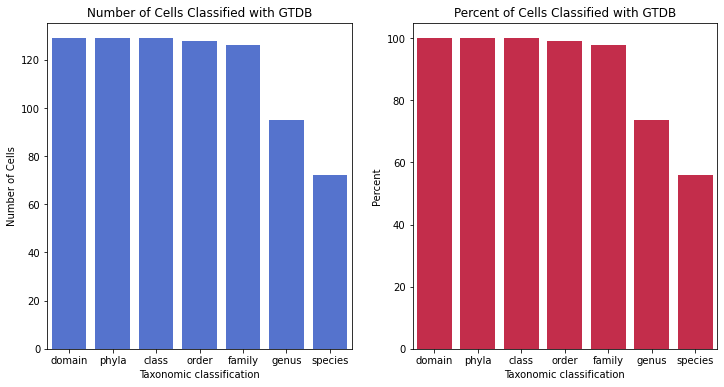

In [57]:
''' 140 meters '''

d140_level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    d140_lcount = count_classified(d140, level)
    print('There are', d140_lcount, 'cells annotated to', level,".") 
    d140_level_counts.append(d140_lcount)

# create a dictionary with the number classified for each level
d140_tax_dict = {'tax_level': levels, 'num_cells_classified': d140_level_counts} 

# create a dataframe from the dictionary
d140_tax_df = pd.DataFrame(data = d140_tax_dict)

# calculate total number of cells classified
d140_tot = len(d140)

# add an percent column
d140_tax_df['percent_classified'] = d140_tax_df['num_cells_classified']/d140_tot*100

# add sample_depth column
d140_tax_df['sample_depth'] = 140

print(d140_tax_df)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = d140_tax_df, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].set_title('Number of Cells Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = d140_tax_df, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_title('Percent of Cells Classified with GTDB')

This figure shows the number of cells with classified at each depth in both raw counts (on the left in blue) and percentages (on the right in red) for all of the taxonomic levels. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the right axis. Of all of the cells with classified hosts, the majority of them were classfied down to the species level. This is about the same the 80 meter sample and more than the 95 meter sample.

There are 173 cells annotated to domain .
There are 170 cells annotated to phyla .
There are 170 cells annotated to class .
There are 170 cells annotated to order .
There are 166 cells annotated to family .
There are 136 cells annotated to genus .
There are 87 cells annotated to species .
  tax_level  num_cells_classified  percent_classified  sample_depth
0    domain                   173          100.000000           400
1     phyla                   170           98.265896           400
2     class                   170           98.265896           400
3     order                   170           98.265896           400
4    family                   166           95.953757           400
5     genus                   136           78.612717           400
6   species                    87           50.289017           400


Text(0.5, 1.0, 'Percent of Cells Classified with GTDB')

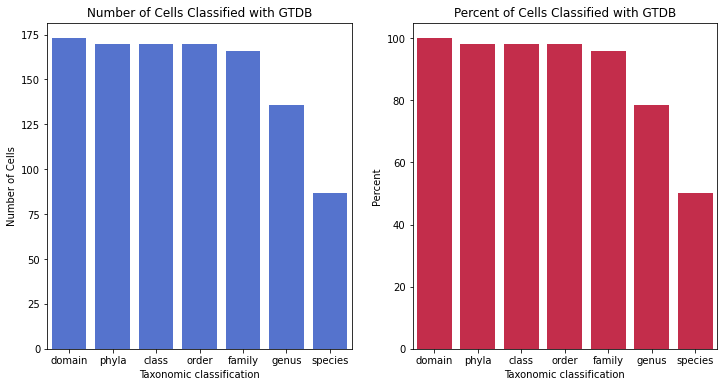

In [58]:
''' 400 meters '''

d400_level_counts = [] # set up empty level counts string

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    d400_lcount = count_classified(d400, level)
    print('There are', d400_lcount, 'cells annotated to', level,".") 
    d400_level_counts.append(d400_lcount)

# create a dictionary with the number classified for each level
d400_tax_dict = {'tax_level': levels, 'num_cells_classified': d400_level_counts} 

# create a dataframe from the dictionary
d400_tax_df = pd.DataFrame(data = d400_tax_dict)

# calculate total number of cells classified
d400_tot = len(d400)

# add an percent column
d400_tax_df['percent_classified'] = d400_tax_df['num_cells_classified']/d400_tot*100

# add sample_depth column
d400_tax_df['sample_depth'] = 400

print(d400_tax_df)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = d400_tax_df, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].set_title('Number of Cells Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = d400_tax_df, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_title('Percent of Cells Classified with GTDB')

This figure shows the number of cells with classified at each depth in both raw counts (on the left in blue) and percentages (on the right in red) for all of the taxonomic levels. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the right axis. Of all of the cells with classified hosts, about half of them were classfied down to the species level.

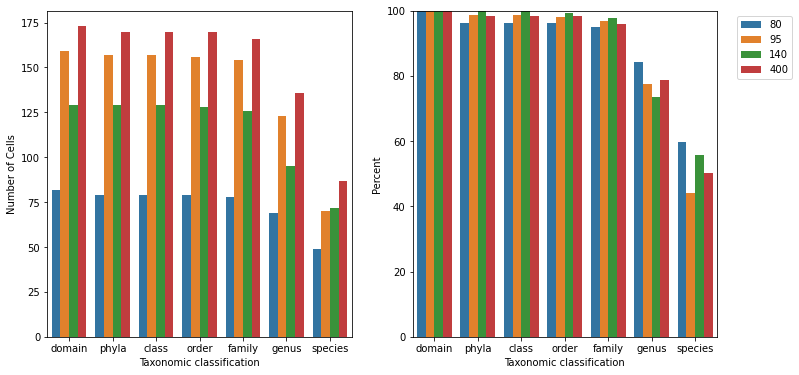

In [60]:
classified_plot = pd.concat([d80_tax_df,d95_tax_df,d140_tax_df,d400_tax_df])

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharex=True)

sns.barplot(x = 'tax_level', y= 'num_cells_classified', data = classified_plot, hue='sample_depth', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of Cells')
axes[0].get_legend().remove()

sns.barplot(x = 'tax_level', y= 'percent_classified', data = classified_plot, hue='sample_depth', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_ylim(0,100)
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

This figure shows the number of cells classified to each level for all sample depths. Raw counts are on the left and percents are on the right. For both of these plots, the taxonomic levels are on the x-axis and either the number or percentage of cells classified on the y-axis. Blue bars represent cells from the 80 meters sample, orange bars represent cells from the 95 meters sample, green bars represent cells from the 140 meters sample, and red bars represent cells from the 400 meters sample.

The percentages of cells classified for each sample are relatively similiar.

## Most abundant classifications

80 Meters Top Phylum: ['Pseudomonadota', 'Thermoproteota', 'Patescibacteria', 'Actinomycetota', 'Planctomycetota', 'Cyanobacteriota', 'Acidobacteriota', 'Chloroflexota', 'Nitrospinota', 'Nanoarchaeota']
----------------------------------------------------------------------------------------------------
80 Meters Top Classes: ['Gammaproteobacteria', 'Nitrososphaeria', 'Acidimicrobiia', 'Alphaproteobacteria', 'Cyanobacteriia', 'Phycisphaerae', 'Paceibacteria', 'Vicinamibacteria', 'ABY1', 'Nanoarchaeia']
----------------------------------------------------------------------------------------------------
80 Meters Top Orders: ['Nitrososphaerales', 'Arenicellales', 'Acidimicrobiales', 'PCC-6307', 'Phycisphaerales', 'Vicinamibacterales', 'Coxiellales', 'Pacearchaeales', 'Comchoanobacterales', 'Anaerolineales']


Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

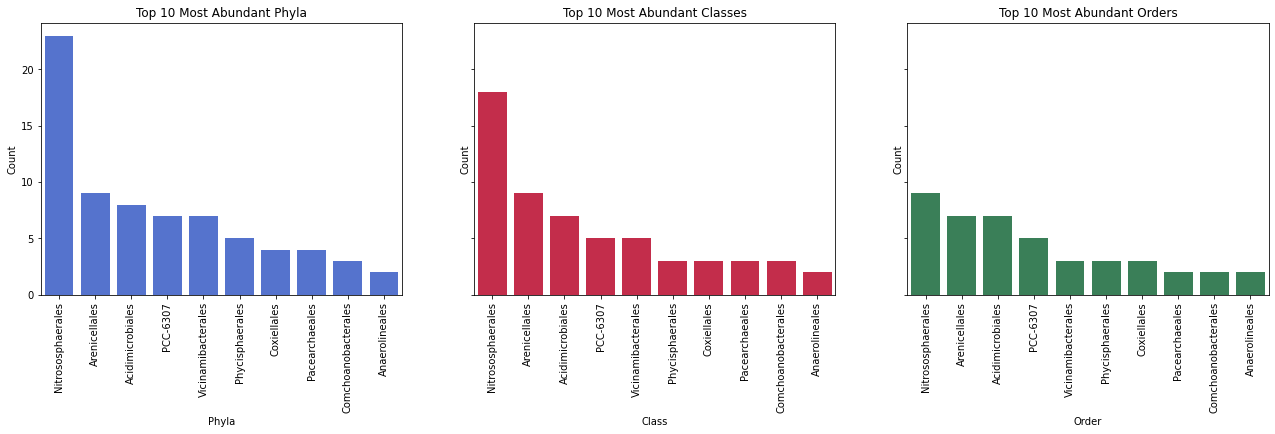

In [61]:
''' 80 meters '''

# create a list of taxonomy columns
tax_cols = ['domain', 'phyla','class','order','family','genus','species']

# create an empty dictionary
d80_top_dict = {}

# for loop to create a list of the 10 most abundant taxonomic groups for each level of classification
for column in tax_cols:
    d80_most_common = d80[column].value_counts().head(10).index.tolist()
    d80_top_dict[column] = d80_most_common

# create a list using the corresponding column of the mag_top_dict
d80_phyla_list = d80_top_dict['phyla']
d80_class_list = d80_top_dict['class']
d80_order_list = d80_top_dict['order']

print('80 Meters Top Phylum:', d80_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('80 Meters Top Classes:', d80_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('80 Meters Top Orders:', d80_order_list)

# subset out observations belonging to the top phylum from the infected cells (virus) dataframe
d80_phyla_df = d80[d80['phyla'].isin(d80_phyla_list)]

# subset out observations belonging to the top classes from the infected cells (virus) dataframe
d80_class_df = d80[d80['class'].isin(d80_class_list)]

# subset out observations beloning to the top classes from teh infected cells (virus) dataframe
d80_order_df = d80[d80['order'].isin(d80_order_list)]

d80_phyla_plot = pd.DataFrame(d80_phyla_df['phyla'].value_counts())
d80_phyla_plot.rename(columns={'phyla':'count'},inplace=True)
d80_phyla_plot['phyla'] = d80_phyla_plot.index

d80_class_plot = pd.DataFrame(d80_class_df['class'].value_counts())
d80_class_plot.rename(columns={'class':'count'},inplace=True)
d80_class_plot['class'] = d80_class_plot.index

d80_order_plot = pd.DataFrame(d80_order_df['order'].value_counts())
d80_order_plot.rename(columns={'order':'count'},inplace=True)
d80_order_plot['order'] = d80_order_plot.index


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharex=True, sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = d80_phyla_plot, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = d80_class_plot, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = d80_order_plot, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')

This figure shows the abundance of the top ten phylum (left, blue), classes (middle, red), and orders (right, green) of the proximeta cells with vmags. Each classification is on the x-axis and count is on the y-axis.

95 Meters Top Phylum: ['Pseudomonadota', 'Chloroflexota', 'Patescibacteria', 'Cyanobacteriota', 'Thermoproteota', 'Planctomycetota', 'Actinomycetota', 'Nanoarchaeota', 'Acidobacteriota', 'Nitrospinota']
----------------------------------------------------------------------------------------------------
95 Meters Top Classes: ['Dehalococcoidia', 'Gammaproteobacteria', 'Cyanobacteriia', 'Nitrososphaeria', 'ABY1', 'Nanoarchaeia', 'Acidimicrobiia', 'Alphaproteobacteria', 'Phycisphaerae', 'Paceibacteria']
----------------------------------------------------------------------------------------------------
95 Meters Top Orders: ['PCC-6307', 'Nitrososphaerales', 'Arenicellales', 'Dehalococcoidales', 'Acidimicrobiales', 'Magasanikbacterales', 'Phycisphaerales', 'Vicinamibacterales', 'Pacearchaeales', 'UBA9983_A']


Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

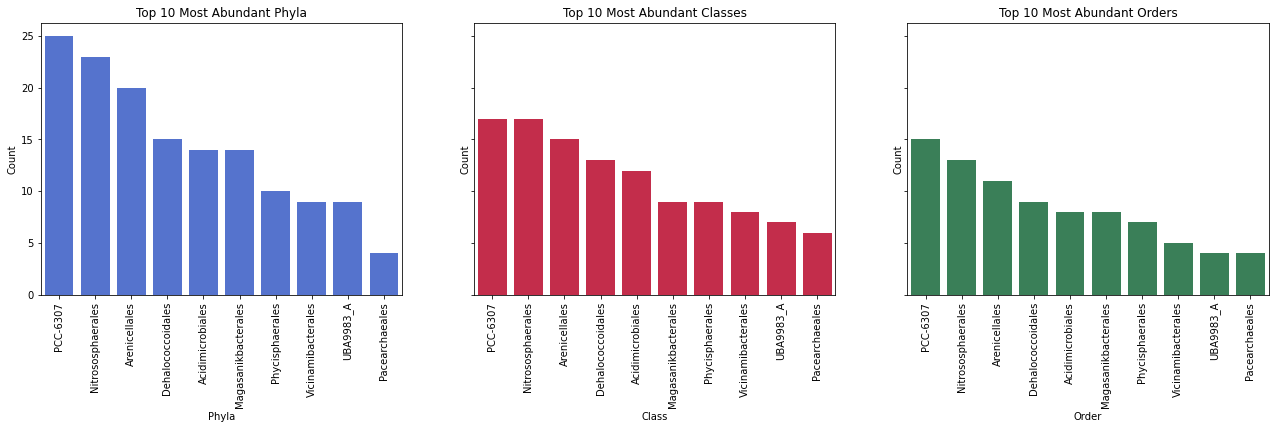

In [62]:
''' 95 meters '''

# create a list of taxonomy columns
tax_cols = ['domain', 'phyla','class','order','family','genus','species']

# create an empty dictionary
d95_top_dict = {}

# for loop to create a list of the 10 most abundant taxonomic groups for each level of classification
for column in tax_cols:
    d95_most_common = d95[column].value_counts().head(10).index.tolist()
    d95_top_dict[column] = d95_most_common

# create a list using the corresponding column of the mag_top_dict
d95_phyla_list = d95_top_dict['phyla']
d95_class_list = d95_top_dict['class']
d95_order_list = d95_top_dict['order']

print('95 Meters Top Phylum:', d95_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('95 Meters Top Classes:', d95_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('95 Meters Top Orders:', d95_order_list)

# subset out observations belonging to the top phylum from the infected cells (virus) dataframe
d95_phyla_df = d95[d95['phyla'].isin(d95_phyla_list)]

# subset out observations belonging to the top classes from the infected cells (virus) dataframe
d95_class_df = d95[d95['class'].isin(d95_class_list)]

# subset out observations beloning to the top classes from teh infected cells (virus) dataframe
d95_order_df = d95[d95['order'].isin(d95_order_list)]

d95_phyla_plot = pd.DataFrame(d95_phyla_df['phyla'].value_counts())
d95_phyla_plot.rename(columns={'phyla':'count'},inplace=True)
d95_phyla_plot['phyla'] = d95_phyla_plot.index

d95_class_plot = pd.DataFrame(d95_class_df['class'].value_counts())
d95_class_plot.rename(columns={'class':'count'},inplace=True)
d95_class_plot['class'] = d95_class_plot.index

d95_order_plot = pd.DataFrame(d95_order_df['order'].value_counts())
d95_order_plot.rename(columns={'order':'count'},inplace=True)
d95_order_plot['order'] = d95_order_plot.index


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharex=True, sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = d95_phyla_plot, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = d95_class_plot, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = d95_order_plot, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')

This figure shows the abundance of the top ten phylum (left, blue), classes (middle, red), and orders (right, green) of the proximeta cells with vmags. Each classification is on the x-axis and count is on the y-axis.

140 Meters Top Phylum: ['Pseudomonadota', 'Planctomycetota', 'Acidobacteriota', 'Chloroflexota', 'Patescibacteria', 'Actinomycetota', 'Armatimonadota', 'Verrucomicrobiota', 'Thermoplasmatota', 'Myxococcota_A']
----------------------------------------------------------------------------------------------------
140 Meters Top Classes: ['Planctomycetia', 'Gammaproteobacteria', 'Alphaproteobacteria', 'Dehalococcoidia', 'Paceibacteria', 'Vicinamibacteria', 'Acidimicrobiia', 'UBA5377', 'Marinisomatia', 'UBA9160']
----------------------------------------------------------------------------------------------------
140 Meters Top Orders: ['Pirellulales', 'Arenicellales', 'Vicinamibacterales', 'UBA5377', 'UBA9983_A', 'Marinisomatales', 'UBA890', 'UBA9160', 'Acidimicrobiales', 'UBA11872']


Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

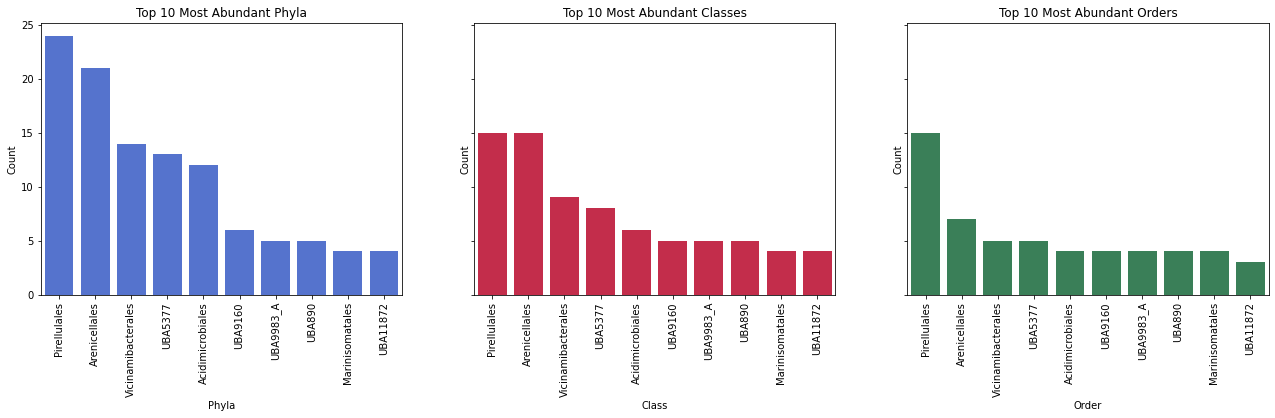

In [63]:
''' 140 meters '''

# create a list of taxonomy columns
tax_cols = ['domain', 'phyla','class','order','family','genus','species']

# create an empty dictionary
d140_top_dict = {}

# for loop to create a list of the 10 most abundant taxonomic groups for each level of classification
for column in tax_cols:
    d140_most_common = d140[column].value_counts().head(10).index.tolist()
    d140_top_dict[column] = d140_most_common

# create a list using the corresponding column of the mag_top_dict
d140_phyla_list = d140_top_dict['phyla']
d140_class_list = d140_top_dict['class']
d140_order_list = d140_top_dict['order']

print('140 Meters Top Phylum:', d140_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('140 Meters Top Classes:', d140_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('140 Meters Top Orders:', d140_order_list)

# subset out observations belonging to the top phylum from the infected cells (virus) dataframe
d140_phyla_df = d140[d140['phyla'].isin(d140_phyla_list)]

# subset out observations belonging to the top classes from the infected cells (virus) dataframe
d140_class_df = d140[d140['class'].isin(d140_class_list)]

# subset out observations beloning to the top classes from teh infected cells (virus) dataframe
d140_order_df = d140[d140['order'].isin(d140_order_list)]

d140_phyla_plot = pd.DataFrame(d140_phyla_df['phyla'].value_counts())
d140_phyla_plot.rename(columns={'phyla':'count'},inplace=True)
d140_phyla_plot['phyla'] = d140_phyla_plot.index

d140_class_plot = pd.DataFrame(d140_class_df['class'].value_counts())
d140_class_plot.rename(columns={'class':'count'},inplace=True)
d140_class_plot['class'] = d140_class_plot.index

d140_order_plot = pd.DataFrame(d140_order_df['order'].value_counts())
d140_order_plot.rename(columns={'order':'count'},inplace=True)
d140_order_plot['order'] = d140_order_plot.index


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharex=True, sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = d140_phyla_plot, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = d140_class_plot, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = d140_order_plot, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')

This figure shows the abundance of the top ten phylum (left, blue), classes (middle, red), and orders (right, green) of the proximeta cells with vmags. Each classification is on the x-axis and count is on the y-axis.

400 Meters Top Phylum: ['Pseudomonadota', 'Planctomycetota', 'Patescibacteria', 'Acidobacteriota', 'Verrucomicrobiota', 'Chloroflexota', 'Nanoarchaeota', 'Thermoplasmatota', 'SAR324', 'Myxococcota_A']
----------------------------------------------------------------------------------------------------
400 Meters Top Classes: ['Gammaproteobacteria', 'Alphaproteobacteria', 'Planctomycetia', 'Verrucomicrobiae', 'Paceibacteria', 'Nanoarchaeia', 'ABY1', 'Poseidoniia', 'Vicinamibacteria', 'Gracilibacteria']
----------------------------------------------------------------------------------------------------
400 Meters Top Orders: ['Pirellulales', 'Arenicellales', 'Verrucomicrobiales', 'MGIII', 'Peribacterales', 'Vicinamibacterales', 'Paceibacterales', 'Caulobacterales', 'Pseudomonadales', 'UBA9160']


Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

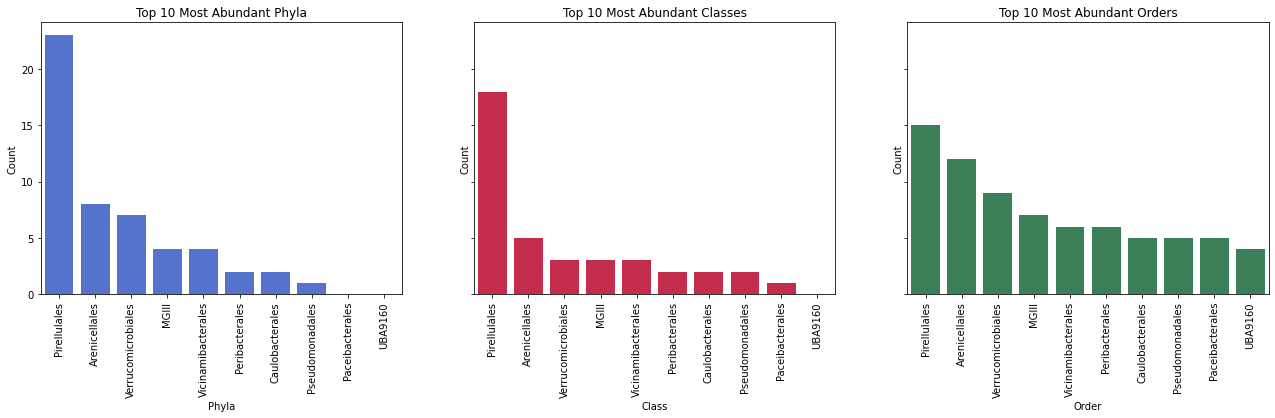

In [64]:
''' 400 meters '''

# create a list of taxonomy columns
tax_cols = ['domain', 'phyla','class','order','family','genus','species']

# create an empty dictionary
d400_top_dict = {}

# for loop to create a list of the 10 most abundant taxonomic groups for each level of classification
for column in tax_cols:
    d400_most_common = d400[column].value_counts().head(10).index.tolist()
    d400_top_dict[column] = d400_most_common

# create a list using the corresponding column of the mag_top_dict
d400_phyla_list = d400_top_dict['phyla']
d400_class_list = d400_top_dict['class']
d400_order_list = d400_top_dict['order']

print('400 Meters Top Phylum:', d400_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('400 Meters Top Classes:', d400_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('400 Meters Top Orders:', d400_order_list)

# subset out observations belonging to the top phylum from the infected cells (virus) dataframe
d400_phyla_df = d80[d80['phyla'].isin(d400_phyla_list)]

# subset out observations belonging to the top classes from the infected cells (virus) dataframe
d400_class_df = d80[d80['class'].isin(d400_class_list)]

# subset out observations beloning to the top classes from teh infected cells (virus) dataframe
d400_order_df = d400[d400['order'].isin(d400_order_list)]

d400_phyla_plot = pd.DataFrame(d400_phyla_df['phyla'].value_counts())
d400_phyla_plot.rename(columns={'phyla':'count'},inplace=True)
d400_phyla_plot['phyla'] = d400_phyla_plot.index

d400_class_plot = pd.DataFrame(d400_class_df['class'].value_counts())
d400_class_plot.rename(columns={'class':'count'},inplace=True)
d400_class_plot['class'] = d400_class_plot.index

d400_order_plot = pd.DataFrame(d400_order_df['order'].value_counts())
d400_order_plot.rename(columns={'order':'count'},inplace=True)
d400_order_plot['order'] = d400_order_plot.index


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharex=True, sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = d400_phyla_plot, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'count', data = d400_class_plot, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = d400_order_plot, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')

This figure shows the abundance of the top ten phylum (left, blue), classes (middle, red), and orders (right, green) of the proximeta cells with vmags. Each classification is on the x-axis and count is on the y-axis.

phylum in common ['Pseudomonadota', 'Acidobacteriota', 'Planctomycetota', 'Chloroflexota', 'Patescibacteria']
----------------------------------------------------------------------------------------------------
classes in common ['Gammaproteobacteria', 'Alphaproteobacteria', 'Paceibacteria']
----------------------------------------------------------------------------------------------------
orders in common ['Arenicellales', 'Vicinamibacterales']


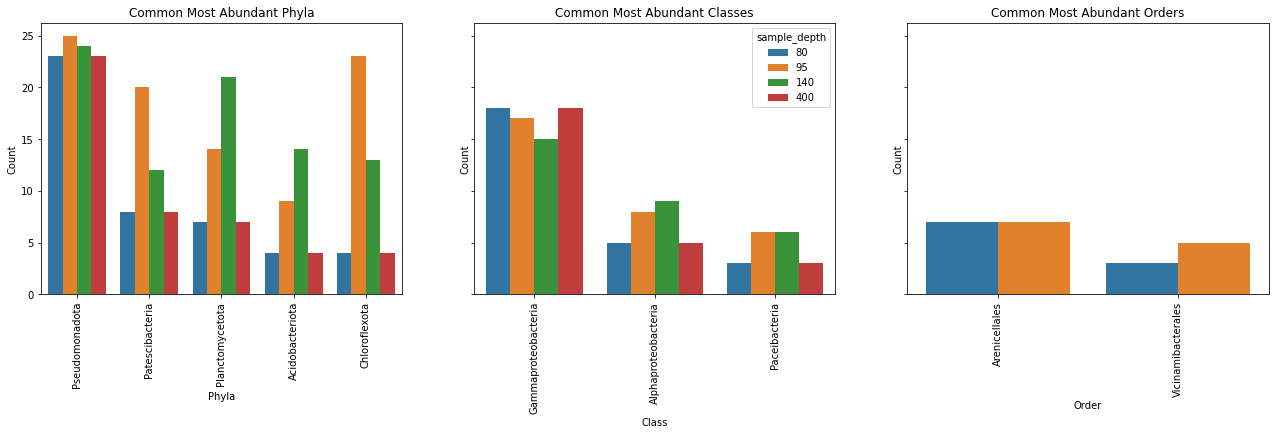

In [70]:
# compare classifications

common_phyla_list = list(set(d80_phyla_list) & set(d95_phyla_list) & set(d140_phyla_list) & set(d400_phyla_list))
common_class_list = list(set(d80_class_list) & set(d95_class_list) & set(d140_class_list) & set(d400_class_list))
common_order_list = list(set(d80_order_list) & set(d95_order_list) & set(d140_order_list) & set(d400_order_list))

print('phylum in common', common_phyla_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('classes in common', common_class_list)
print("-" * 100)  # Print a line of hyphens as a separator
print('orders in common',common_order_list)

d80_common_phyla = d80_phyla_plot[d80_phyla_plot['phyla'].isin(common_phyla_list)]
d80_common_class = d80_class_plot[d80_class_plot['class'].isin(common_class_list)]
d80_common_order = d80_order_plot[d80_order_plot['order'].isin(common_order_list)]

d95_common_phyla = d95_phyla_plot[d95_phyla_plot['phyla'].isin(common_phyla_list)]
d95_common_class = d95_class_plot[d95_class_plot['class'].isin(common_class_list)]
d95_common_order = d95_order_plot[d95_order_plot['order'].isin(common_order_list)]

d140_common_phyla = d140_phyla_plot[d140_phyla_plot['phyla'].isin(common_phyla_list)]
d140_common_class = d140_class_plot[d140_class_plot['class'].isin(common_class_list)]
d140_common_order = d140_order_plot[d140_order_plot['order'].isin(common_order_list)]

d400_common_phyla = d400_phyla_plot[d400_phyla_plot['phyla'].isin(common_phyla_list)]
d400_common_class = d400_class_plot[d400_class_plot['class'].isin(common_class_list)]
d400_common_order = d400_order_plot[d400_order_plot['order'].isin(common_order_list)]

for df in list([d80_common_phyla, d80_common_class, d80_common_order]):
    df['sample_depth'] = 80
    
for df in list([d95_common_phyla, d95_common_class, d95_common_order]):
    df['sample_depth'] = 95
    
for df in list([d140_common_phyla, d140_common_class, d140_common_order]):
    df['sample_depth'] = 140
    
for df in list([d400_common_phyla, d400_common_class, d400_common_order]):
    df['sample_depth'] = 400
    
common_phyla_plot = pd.concat([d80_common_phyla, d95_common_phyla, d140_common_phyla, d400_common_phyla])
common_class_plot = pd.concat([d80_common_class, d95_common_class, d140_common_class, d400_common_class])
common_order_plot = pd.concat([d80_common_order, d80_common_order, d140_common_order, d140_common_order])


# plot abundances for common classifications

#custom_palette = {'vmag': '#984ea3', 'contig': '#ff7f00'}

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5), sharey=True)

for ax in axes: # for loop to change all plots to have rotated text on the x-axis by 90 degrees
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'count', data = common_phyla_plot, hue='sample_depth', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Common Most Abundant Phyla')
axes[0].get_legend().remove()

sns.barplot(x = 'class', y= 'count', data = common_class_plot, hue='sample_depth', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Common Most Abundant Classes')

sns.barplot(x = 'order', y= 'count', data = common_order_plot, hue='sample_depth', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Common Most Abundant Orders')
axes[2].get_legend().remove()

There are 5 phyla, 3 classes, and 2 orders that are commmon between the top 10 most abundant taxonomic levels of cells for all sample depths. The 5 common phyla are Pseudomonadota, Acidobacteriota, Planctomycetota, Chloroflexota, and Patescibacteria. The 3 common classes are Gammaproteobacteria, Alphaproteobacteria, and Paceibacteria. Finally, the 2 common orders are Arenicellales and Vicinamibacterales.

This figure shows the raw abundances of these phyla (left), classes (middle), and orders (right). Each phyla, class, or order respectively are on the x-axis and count is on the y-axis of these 3 plots. Blue bars represent a sample depth of 80 meters, orange bars represent a sample depth of 95 meters, green bars represent a sample depth of 140 meters, and red bars represent a sample depth of 400 meters.